In [2]:
pip install openai

In [17]:
!pip install textblob
!pip install nltk

In [12]:
import openai
openai.api_key = "xxxxxxx"

In [13]:
import pandas as pd
import numpy as np
import random
import openai
from tqdm import tqdm

np.random.seed(42)
random.seed(42)

n_samples = 30000
ages = np.random.randint(18, 80, n_samples)
subscription_plans = np.random.choice(['Basic', 'Pro', 'Enterprise'], size=n_samples)
monthly_usage = np.random.exponential(scale=100, size=n_samples)
event_observed = np.random.binomial(1, 0.35, n_samples)
duration = np.random.exponential(scale=14, size=n_samples).astype(int)

complaint_types = [
    "Slow internet service",
    "Billing errors and overcharges",
    "Poor customer support experience",
    "Frequent service outages",
    "High subscription cost complaints",
    "Unresolved technical issues",
    "Difficult cancellation process",
    "Positive feedback with minor complaints",
    "Mobile app not working properly",
    "Installation delays and problems"
]

def generate_realistic_ticket(complaint_type):
    try:
        response = openai.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role": "user", "content": f"Write a short, frustrated, less formal customer complaint about: {complaint_type}. No greeting, no closing, just get straight to the issue."}
            ],
            temperature=0.7,
            max_tokens=150
        )
        ticket = response.choices[0].message.content
    except Exception as e:
        print(f"Error generating ticket: {e}")
        ticket = f"Complaint about {complaint_type}."
    return ticket.strip()

print("Generating support ticket texts...")
sampled_tickets = []

for ctype in tqdm(complaint_types, desc="Generating support tickets"):
    for _ in range(30):
        ticket = generate_realistic_ticket(ctype)
        sampled_tickets.append(ticket)

support_tickets = np.random.choice(sampled_tickets, n_samples)

data = pd.DataFrame({
    'customer_id': range(1, n_samples + 1),
    'age': ages,
    'subscription_plan': subscription_plans,
    'monthly_usage': monthly_usage,
    'duration_months': duration,
    'event_observed': event_observed,
    'support_ticket_text': support_tickets
})

data.to_csv('ultra_realistic_survival_data.csv', index=False)

print("\nUltra-realistic survival dataset generated! File: 'ultra_realistic_survival_data.csv'")
print(data.head())


Generating support ticket texts...


Generating support tickets: 100%|██████████| 10/10 [09:35<00:00, 57.50s/it]



Ultra-realistic survival dataset generated! File: 'ultra_realistic_survival_data.csv'
   customer_id  age subscription_plan  monthly_usage  duration_months  \
0            1   56        Enterprise      11.390787                5   
1            2   69             Basic      83.222020               23   
2            3   46             Basic     129.585591               90   
3            4   32               Pro     138.797824                2   
4            5   60             Basic      89.524752               14   

   event_observed                                support_ticket_text  
0               0  The app keeps crashing every time I try to ope...  
1               0  I've been waiting over a month for my installa...  
2               0  I'm really fed up with how long it's taking to...  
3               0  I recently visited your store and while I appr...  
4               0  Trying to cancel my subscription has been a ni...  


In [14]:
from google.colab import files
files.download('ultra_realistic_survival_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('punkt')

/usr/local/lib/python3.11/dist-packages/nltk/__init__.py:135: RuntimeWarning: coroutine 'generate_tickets_batch' was never awaited
  from nltk.featstruct import *
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
data = pd.read_csv('ultra_realistic_survival_data.csv')

In [20]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [21]:
def detect_urgency(text):
    urgency_keywords = ['urgent', 'immediate', 'as soon as possible', 'critical', 'resolve quickly', 'emergency']
    text_lower = text.lower()
    for keyword in urgency_keywords:
        if keyword in text_lower:
            return 1
    return 0

In [22]:
data['sentiment_score'] = data['support_ticket_text'].apply(get_sentiment)
data['urgency_flag'] = data['support_ticket_text'].apply(detect_urgency)

In [23]:
data.to_csv('enhanced_survival_data_with_nlp.csv', index=False)

In [24]:
files.download('enhanced_survival_data_with_nlp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

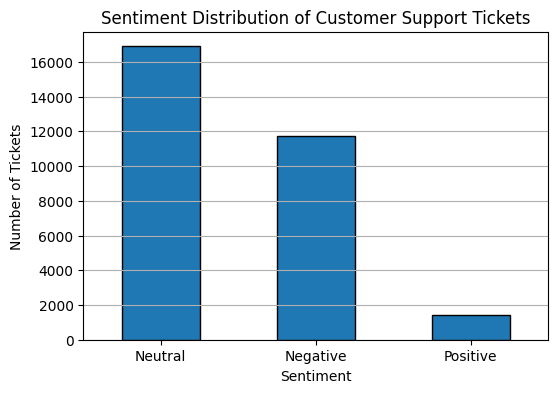

In [25]:
import matplotlib.pyplot as plt
sentiment_counts = data['sentiment_score'].value_counts()

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', edgecolor='black')
plt.title('Sentiment Distribution of Customer Support Tickets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

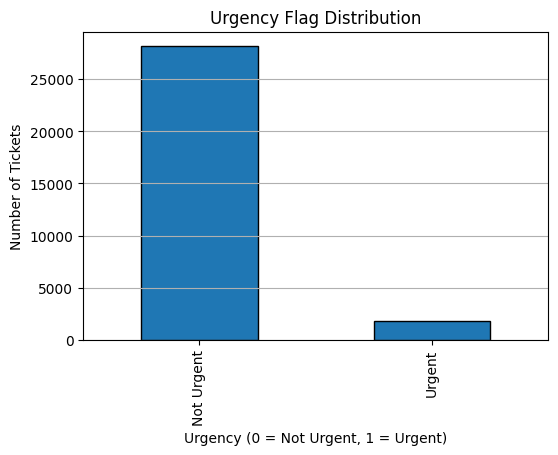

In [26]:
urgency_counts = data['urgency_flag'].value_counts()

plt.figure(figsize=(6,4))
urgency_counts.plot(kind='bar', edgecolor='black')
plt.title('Urgency Flag Distribution')
plt.xlabel('Urgency (0 = Not Urgent, 1 = Urgent)')
plt.ylabel('Number of Tickets')
plt.xticks([0,1], labels=["Not Urgent", "Urgent"])
plt.grid(axis='y')
plt.show()

In [27]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=5d2288d697c93a233fb49712c3ca37e4219d38c8680dbb8263c14adafc9f0a07
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [28]:
from lifelines import KaplanMeierFitter, CoxPHFitter

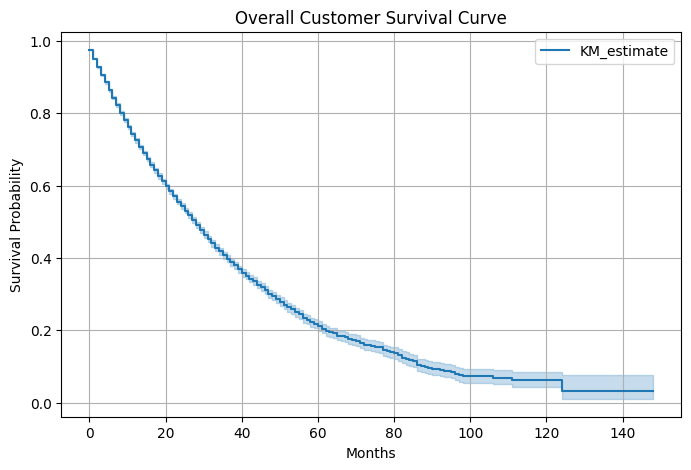

In [29]:
kmf = KaplanMeierFitter()
kmf.fit(durations=data['duration_months'], event_observed=data['event_observed'])
plt.figure(figsize=(8,5))
kmf.plot_survival_function()
plt.title('Overall Customer Survival Curve')
plt.xlabel('Months')
plt.ylabel('Survival Probability')
plt.grid()
plt.show()

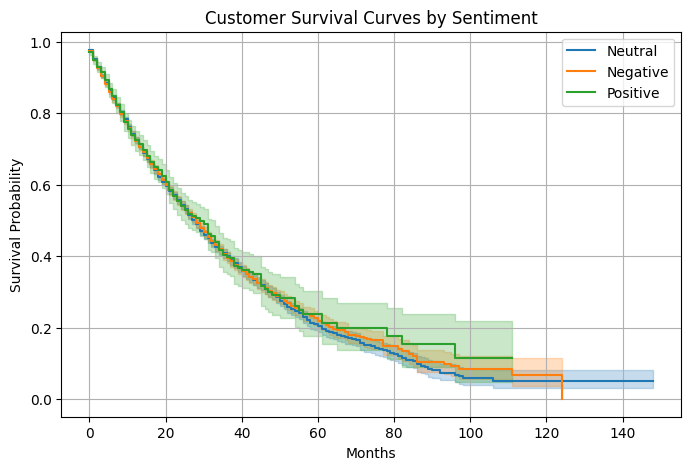

In [30]:
plt.figure(figsize=(8,5))

for sentiment in data['sentiment_score'].unique():
    mask = data['sentiment_score'] == sentiment
    kmf.fit(durations=data[mask]['duration_months'], event_observed=data[mask]['event_observed'], label=sentiment)
    kmf.plot_survival_function()

plt.title('Customer Survival Curves by Sentiment')
plt.xlabel('Months')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid()
plt.show()

In [31]:
data_encoded = pd.get_dummies(data, columns=['subscription_plan'], drop_first=True)
data_encoded['sentiment_score'] = data_encoded['sentiment_score'].map({'Negative': -1, 'Neutral': 0, 'Positive': 1})
features = [
    'age',
    'monthly_usage',
    'sentiment_score',
    'urgency_flag',
    'subscription_plan_Pro',
    'subscription_plan_Enterprise'
]
cox_data = data_encoded[['duration_months', 'event_observed'] + features]


In [32]:
cph = CoxPHFitter()
cph.fit(cox_data, duration_col='duration_months', event_col='event_observed')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 30000 total observations, 19445 right-censored observations>
             duration col = 'duration_months'
                event col = 'event_observed'
      baseline estimation = breslow
   number of observations = 30000
number of events observed = 10555
   partial log-likelihood = -98446.61
         time fit was run = 2025-04-27 19:59:52 UTC

---
                              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                     
age                           0.00      1.00      0.00           -0.00            0.00                1.00                1.00
monthly_usage                -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
sentiment_score              -0.00      1.00      0.02           -0.04            0.03                0.96                1.03
urgency_flag                  0.05      1.05      0.04           -0.03            0.13                0.97                1.14
subscription_plan_Pro         0.01      1.01      0.02           -0.03            0.06                0.97                1.06
subscription_plan_Enterprise  0.02      1.02      0.02           -0.03            0.07                0.98                1.07

                              cmp to     z    p  -log2(p)
covariate                                                
age                             0.00  0.87 0.39      1.37
monthly_usage                   0.00 -0.56 0.57      0.81
sentiment_score                 0.00 -0.22 0.83      0.27
urgency_flag                    0.00  1.19 0.24      2.09
subscription_plan_Pro           0.00  0.52 0.60      0.73
subscription_plan_Enterprise    0.00  0.91 0.36      1.46
---
Concordance = 0.51
Partial AIC = 196905.23
log-likelihood ratio test = 3.33 on 6 df
-log2(p) of ll-ratio test = 0.38